In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx import gml

In [33]:
#Input files
cluster_fp = "../data/data_mmseqsDB_clu.tsv"
graph_fp = "../data/graphs/updated_All_Asgards_042423.gml" 
previous_graph_fp = "../data/graphs/All_Asgards_042423.gml"
undi_graph_fp = "../data/graphs/updated_undirected_All_Asgards_042423_undi.gml"
undi_20_fp = "../data/graphs/20_operonic_updated_undirected_All_Asgards_042423.gml"

In [34]:
#Get the node that includes the desired protein
def get_node_by_protein(protein, cluster_tsv):
    cluster_df = pd.read_csv(cluster_tsv, sep="\t", header= None) #["Node", "Protein"])
    cluster_df = cluster_df[cluster_df[1] == protein]
    return cluster_df[0].values[0]

def get_node_neighborhood(graph_gml, node, radius):
    G = nx.read_gml(graph_gml)
    return nx.ego_graph(G, node, radius=radius)

def output_cosmograph_tsv(cluster_tsv, graph_gml, protein):
    node = get_node_by_protein(protein, cluster_tsv)
    neighborhood = get_node_neighborhood(graph_gml, node)
    neighborhood.append(node)
    with open("cosmograph.tsv", "w") as f:
        f.write("Node\tProtein\n")
        for n in neighborhood:
            f.write(f"{n}\t{protein}\n")

In [43]:
print(G.number_of_nodes()
#G.number_of_edges()
# number of edges 79424

719838

In [37]:
G = nx.read_gml(undi_20_fp)


In [40]:
#Look at the average connectivity of the graph
nx.average_node_connectivity(G)


KeyboardInterrupt: 

In [41]:
nx.number_connected_components(G)

708309

In [28]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=8)

KeyboardInterrupt: 

In [35]:
#Read in graph!
asgard_commd = 'Meg19_1012_Bin_228-Meg19_1012_Bin_228_scaffold_27102_144_3'
commd_node = get_node_by_protein(asgard_commd, cluster_fp)
commd_operon = get_node_neighborhood(undi_20_fp, commd_node, 2)

In [36]:

commd_operon.nodes()

NodeView(('D4998_C1112_H1_Bin_443_scaffold_773765_3',))

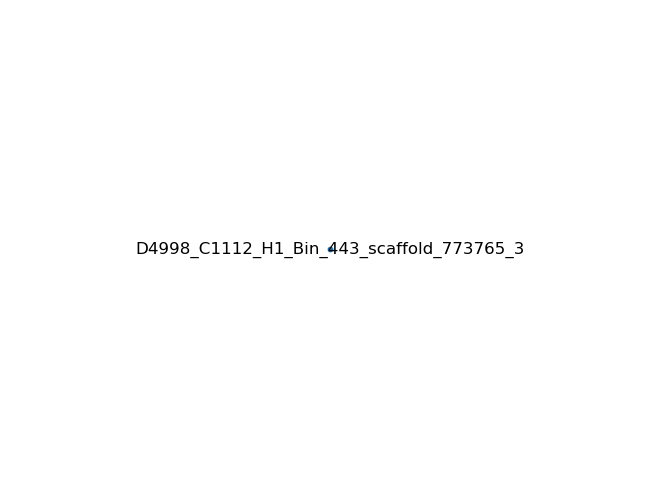

In [26]:
#Draw the graph
#G = nx.read_gml(graph_fp)
pos = nx.spring_layout(commd_operon)
nx.draw(commd_operon, pos, with_labels=True, node_size=10)

In [ ]:
#Write out smol graph to tsvs for cosmograph! 
output_nodes_tsv = 'data/GuaPO_clu30_nodes.tsv'
output_edges_tsv = 'data/GuaPO_clu30_edges.tsv'

with open(output_nodes_tsv, 'w') as node_file:
    node_file.write("NodeId\tlabel\n")  # Modify based on your node attributes
    for node, data in Guapo_G.nodes(data=True):
        # Write node and attributes to the file, ensure attributes match what's in your graph
        node_file.write(f"{node}\t{data.get('label', '')}\n")
print(f'saved nodes to {output_nodes_tsv}')
# Open a file to write the edge data
with open(output_edges_tsv, 'w') as edge_file:
    edge_file.write("Source\tTarget\tWeight\n")  # Modify if you have different or additional attributes
    for source, target, data in Guapo_G.edges(data=True):
        # Write edge and attributes to the file, ensure attributes match what's in your graph
        edge_file.write(f"{source}\t{target}\t{data.get('weight', '')}\n")
print(f'saved edges to {output_edges_tsv}')

Code snippet to make a shuffled fasta for making the test set: 

In [1]:
from Bio import SeqIO
import random

# Load your FASTA file
file_path = '../data/GUAYMAS2020_scaffolds_ProdigalHeaders.1L.fasta'

# Read all sequences into a list
records = list(SeqIO.parse(file_path, 'fasta'))

# Shuffle the list of records
random.shuffle(records)

# Write the shuffled records to a new file
shuffled_file_path = '../data/Prodigal_GUAYMAS2020_shuffled.fasta'
with open(shuffled_file_path, 'w') as output_handle:
    SeqIO.write(records, output_handle, 'fasta')
